CSV file containing historical weather data for a city. The file has the following columns:
 
Date: The date of the recorded data.
Temperature: The average temperature of the day in Celsius.
Precipitation: The precipitation in mm.
WindSpeed: The average wind speed in km/h.

The task is to:
 
Load the data into a pandas DataFrame.
Perform data cleaning and preprocessing:
Check for and handle missing values.
Convert the Date column to a datetime type.
Use NumPy to calculate the following statistics for the temperature:
Mean
Standard deviation
Maximum
Minimum
Generate a time series plot using Matplotlib to show the temperature trend over time.
Create a bar chart to show the average monthly precipitation.
Plot a scatter plot to examine the relationship between wind speed and temperature.

In [3]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = 'weather_data(in).csv'
weather_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
weather_data.head()

,Date,Temperature,Precipitation,WindSpeed
0,1/1/2023,5.0,1.2,10.5
1,1/2/2023,6.1,0.0,8.4
2,1/3/2023,4.3,3.4,12.1
3,1/4/2023,7.2,0.0,9.7
4,1/5/2023,8.5,0.0,7.3


In [5]:
import numpy as np

# Check for missing values
missing_values = weather_data.isnull().sum()

# Convert the Date column to datetime type
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Display missing values and data types
missing_values, weather_data.dtypes

(Date             0
 Temperature      0
 Precipitation    0
 WindSpeed        0
 dtype: int64,
 Date             datetime64[ns]
 Temperature             float64
 Precipitation           float64
 WindSpeed               float64
 dtype: object)

In [7]:
# Calculate statistics for the Temperature column
mean_temperature = np.mean(weather_data['Temperature'])
std_temperature = np.std(weather_data['Temperature'])
max_temperature = np.max(weather_data['Temperature'])
min_temperature = np.min(weather_data['Temperature'])

statistics = {
    'Mean Temperature': mean_temperature,
    'Standard Deviation': std_temperature,
    'Maximum Temperature': max_temperature,
    'Minimum Temperature': min_temperature
}

statistics


{'Mean Temperature': 6.354838709677419,
 'Standard Deviation': 1.1639306901206734,
 'Maximum Temperature': 8.5,
 'Minimum Temperature': 4.3}

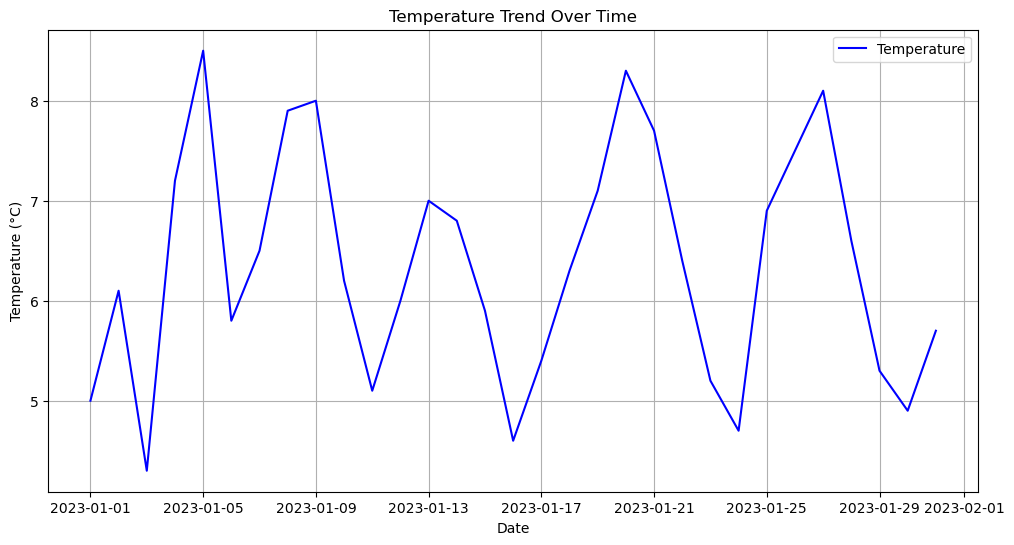

In [9]:
import matplotlib.pyplot as plt

# Generate time series plot for temperature trend over time
plt.figure(figsize=(12, 6))
plt.plot(weather_data['Date'], weather_data['Temperature'], label='Temperature', color='b')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

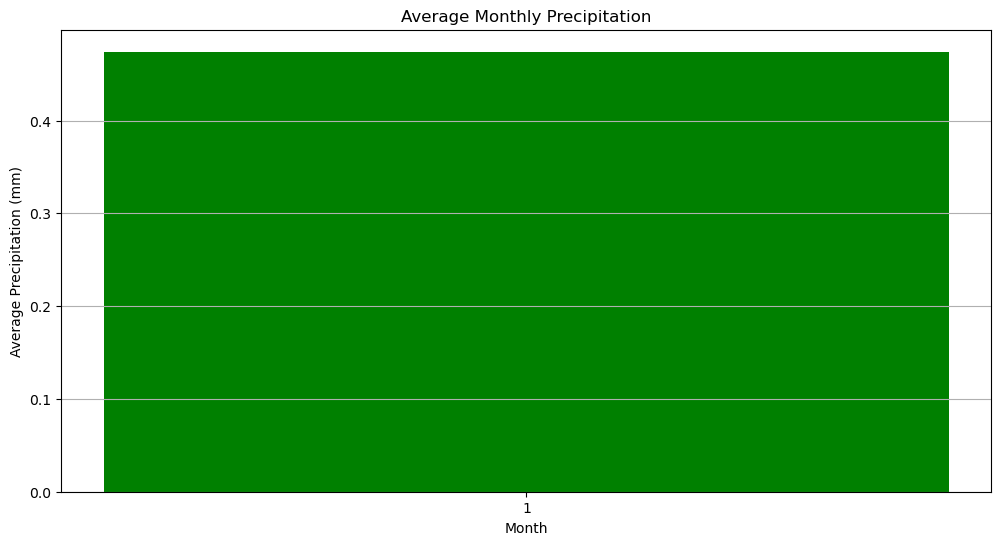

In [11]:
# Extract month from the Date column and add it as a new column
weather_data['Month'] = weather_data['Date'].dt.month

# Calculate average monthly precipitation
monthly_precipitation = weather_data.groupby('Month')['Precipitation'].mean().reset_index()

# Generate bar chart for average monthly precipitation
plt.figure(figsize=(12, 6))
plt.bar(monthly_precipitation['Month'], monthly_precipitation['Precipitation'], color='g')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')
plt.title('Average Monthly Precipitation')
plt.xticks(monthly_precipitation['Month'])
plt.grid(axis='y')
plt.show()

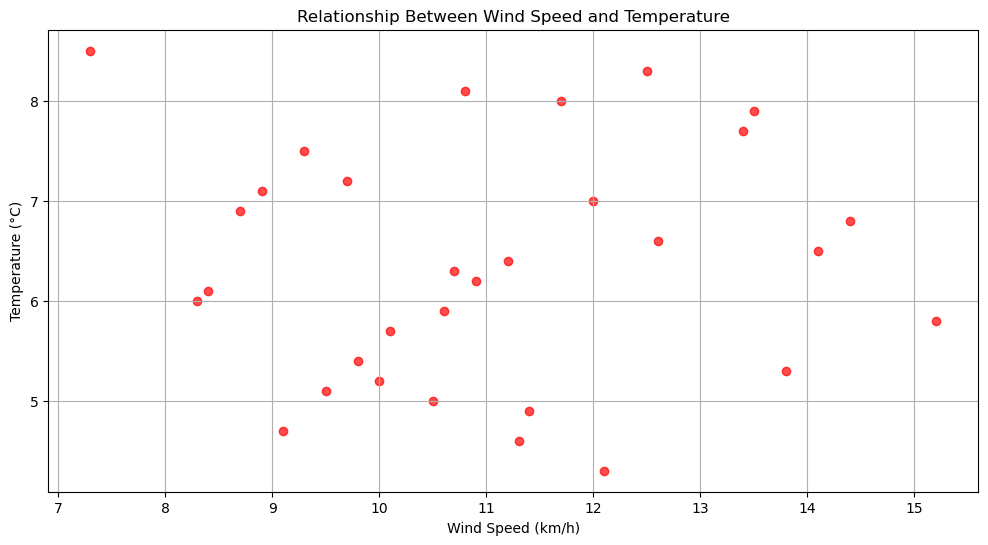

In [13]:
# Generate scatter plot for wind speed vs temperature
plt.figure(figsize=(12, 6))
plt.scatter(weather_data['WindSpeed'], weather_data['Temperature'], color='r', alpha=0.7)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Temperature (°C)')
plt.title('Relationship Between Wind Speed and Temperature')
plt.grid(True)
plt.show()